In [56]:
import pandas as pd 
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import MinMaxScaler
df=pd.read_csv("/home/melvin/Downloads/car_purchasing.csv")
print(df.describe())
print(df.isnull().sum())
df

           gender         age  annual Salary  credit card debt  \
count  500.000000  500.000000     500.000000        500.000000   
mean     0.506000   46.241674   62127.239608       9607.645049   
std      0.500465    7.978862   11703.378228       3489.187973   
min      0.000000   20.000000   20000.000000        100.000000   
25%      0.000000   40.949969   54391.977195       7397.515792   
50%      1.000000   46.049901   62915.497035       9655.035568   
75%      1.000000   51.612263   70117.862005      11798.867487   
max      1.000000   70.000000  100000.000000      20000.000000   

            net worth  car purchase amount  
count      500.000000           500.000000  
mean    431475.713625         44209.799218  
std     173536.756340         10773.178744  
min      20000.000000          9000.000000  
25%     299824.195900         37629.896040  
50%     426750.120650         43997.783390  
75%     557324.478725         51254.709517  
max    1000000.000000         80000.000000  


,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248
...,...,...,...,...,...,...,...,...,...
495,Walter,ligula@Cumsociis.ca,Nepal,0,41.462515,71942.40291,6995.902524,541670.1016,48901.44342
496,Vanna,Cum.sociis.natoque@Sedmolestie.edu,Zimbabwe,1,37.642000,56039.49793,12301.456790,360419.0988,31491.41457
497,Pearl,penatibus.et@massanonante.com,Philippines,1,53.943497,68888.77805,10611.606860,764531.3203,64147.28888
498,Nell,Quisque.varius@arcuVivamussit.net,Botswana,1,59.160509,49811.99062,14013.034510,337826.6382,45442.15353


In [19]:
#for scaling we need to check the normality of the data
#and to check the sales influencing attribute
import matplotlib.pyplot as plt
an_sa=df["annual Salary"]
debt=df["credit card debt"]
net_worth=df["net worth"]
age=df["age"]
car_pur_amt=df["car purchase amount"]
X=[an_sa,debt,net_worth,age,car_pur_amt]
print(an_sa.corr(car_pur_amt))   #correlation btw annual salary and debt
print(net_worth.corr(car_pur_amt))  #corr btw netwrth and car pur amt
print(debt.corr(car_pur_amt))  #corr btw debt and car pur amt
print(age.corr(car_pur_amt))  #corr btw age and car pur amt

0.6178616932472547
0.4885799558543553
0.02888242656151418
0.6328645449946556


In [4]:
from sklearn import linear_model
from sklearn.preprocessing import StandardScaler
scale=StandardScaler()
scaledX=scale.fit_transform(X)
scaledX

array([[-0.07946396, -0.31644508, -0.38909705, ..., -0.3851716 ,
        -0.31542781, -0.3107992 ],
       [-0.66598601, -0.59942656, -0.56285407, ..., -0.58424172,
        -0.60044507, -0.60775871],
       [ 1.93830737,  1.98576074,  1.99351496, ...,  1.99108732,
         1.97763196,  1.98341544],
       [-0.79849092, -0.64668814, -0.60815833, ..., -0.62030585,
        -0.71154035, -0.66114474],
       [-0.39436648, -0.42320096, -0.43340551, ..., -0.40136814,
        -0.35021874, -0.40371279]])

In [20]:
scaled_annual_salary=pd.Series(scaledX[0])
scaled_car_purchasing_amt=pd.Series(scaledX[4])
scaled_credit_card_debt=pd.Series(scaledX[1])
#scaled correlation btw attributes vs car purchasing amt
print(scaled_annual_salary.corr(scaled_car_purchasing_amt)) #corr with scaled_annual_salary
print(scaled_credit_card_debt.corr(scaled_car_purchasing_amt)) #corr with scaled_credit_debt

0.8168053560398113
-0.7757343531835045


m= 0.5687532549167688


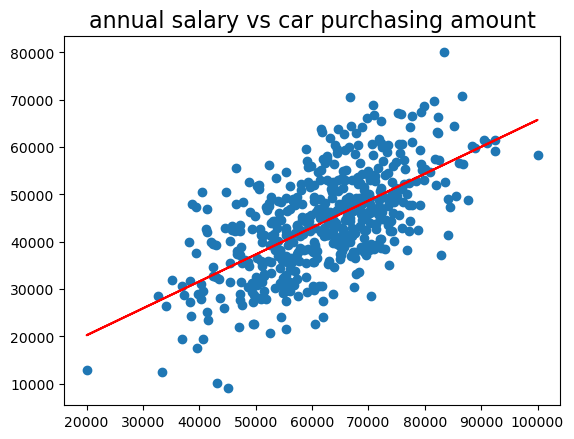

In [21]:
import matplotlib.pyplot as plt
plt.scatter(an_sa,car_pur_amt)
slope,intercept,r,p,std_err=ss.linregress(an_sa,car_pur_amt)
def fun(x):
    return slope*x+intercept
mymodel=list(map(fun,an_sa))
plt.plot(an_sa,mymodel,c="r")
plt.title("annual salary vs car purchasing amount",fontsize=16)
print("m=",slope)
plt.show()

m= -1.046010235871143


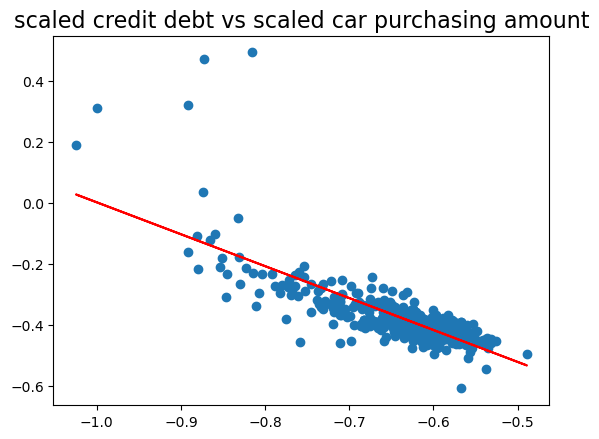

In [22]:
import matplotlib.pyplot as plt
plt.scatter(scaled_credit_card_debt,scaled_car_purchasing_amt)
slope,intercept,r,p,std_err=ss.linregress(scaled_credit_card_debt,scaled_car_purchasing_amt)
def fun(x):
    return slope*x+intercept
mymodel=list(map(fun,scaled_credit_card_debt))
plt.plot(scaled_credit_card_debt,mymodel,c="r")
plt.title("scaled credit debt vs scaled car purchasing amount",fontsize=16)
print("m=",slope)
plt.show()

In [57]:
#making data frame without strings
df.drop(columns = ["customer name","customer e-mail","country","gender"],axis = 1,inplace = True)
print(df)
X = df.drop(columns = ["car purchase amount",] , axis = 1)
y = df["car purchase amount"]
Y=pd.Series(y)
sc = StandardScaler()
X = sc.fit_transform(X)
y = sc.fit_transform(y.values.reshape(-1,1))

           age  annual Salary  credit card debt    net worth  \
0    41.851720    62812.09301      11609.380910  238961.2505   
1    40.870623    66646.89292       9572.957136  530973.9078   
2    43.152897    53798.55112      11160.355060  638467.1773   
3    58.271369    79370.03798      14426.164850  548599.0524   
4    57.313749    59729.15130       5358.712177  560304.0671   
..         ...            ...               ...          ...   
495  41.462515    71942.40291       6995.902524  541670.1016   
496  37.642000    56039.49793      12301.456790  360419.0988   
497  53.943497    68888.77805      10611.606860  764531.3203   
498  59.160509    49811.99062      14013.034510  337826.6382   
499  46.731152    61370.67766       9391.341628  462946.4924   

     car purchase amount  
0            35321.45877  
1            45115.52566  
2            42925.70921  
3            67422.36313  
4            55915.46248  
..                   ...  
495          48901.44342  
496          31

In [58]:
Y=Y.values.reshape(-1,1)
X=scaler.fit_transform(X)
Y=scaler.fit_transform(Y)

In [59]:
lr_model=LinearRegression()
lr_model.fit(x_train,y_train)

LinearRegression()

In [60]:
lr_model.score(x_train,y_train)

0.9999999812450086

In [61]:
lr_pred=lr_model.predict(x_test)

In [62]:
ridge=Ridge(alpha=0.001)
ridge.fit(x_train,y_train)

Ridge(alpha=0.001)

In [63]:
ridge.score(x_train,y_train)

0.9999999714074301

In [65]:
print(mean_squared_error(y_test,lr_pred))

4.105940070359047e-10


In [66]:
print(r2_score(y_test,lr_pred))

0.9999999808303804


In [68]:
###lasso regression###

In [69]:
from sklearn.linear_model import Lasso
lasso=Lasso(alpha=0.0001)
lasso.fit(x_train,y_train)

Lasso(alpha=0.0001)

In [70]:
print(lasso.score(x_train,y_train))
lasso_pred= lasso.predict(x_test)
print(mean_squared_error(y_test,lasso_pred))

0.9999510748852835
1.0599367597566582e-06


In [71]:
print(r2_score(y_test,lasso_pred))

0.9999505141719484


In [72]:
###ridge 
from sklearn.linear_model import Ridge
ridge=Ridge(alpha=0.001)
ridge.fit(x_train,y_train)
ridge.score(x_train,y_train)

0.9999999714074301

In [73]:
ridge_pred=ridge.predict(x_test)
print(mean_squared_error(y_test,ridge_pred))
print(r2_score(y_test,ridge_pred))

5.974304022953131e-10
0.9999999721074508


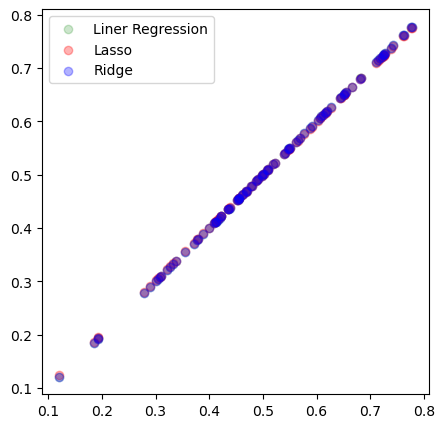

In [76]:
plt.figure(figsize=(5,5))
plt.scatter(y_test,lr_pred,c='g',alpha=0.2,label='Liner Regression')
plt.scatter(y_test,lasso_pred, c='r',alpha=0.3,label='Lasso')
plt.scatter(y_test,ridge_pred,c='b',alpha=0.3, label='Ridge')
plt.legend()
plt.show()